# Classification on Diabetic Patient

Importing the libraries

In [1]:
import pandas as pd # Used to loading files
import numpy as np # Operate with mathematical operations
import matplotlib.pyplot as plt # Used for plotting
import seaborn as sns  # Used for visualizing

Reading the dataset from Kaggle repository

In [2]:
data = pd.read_csv("diabetes.csv") # reading csv file

In [3]:
data.head() # reading first five rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Analyzing the data

In [4]:
data.info() # missing values in rating, type, current and android ver
            # only rating attribute contains numerical data , rest of them belong to categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


# Pre-Processing

In [5]:
# checking the missing values from the data
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values not found in columns

# Normalization

In [6]:
norm_column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [7]:
before_norm = data[norm_column]

In [8]:
before_norm.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,2,138,62,35,0,33.6,0.127
1,0,84,82,31,125,38.2,0.233
2,0,145,0,0,0,44.2,0.630
3,0,135,68,42,250,42.3,0.365
4,1,139,62,41,480,40.7,0.536


In [9]:
after_norm = data[norm_column].apply(lambda x: ( (x-x.min() ) / (x.max() - x.min() ) ) )

In [10]:
after_norm.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559


# Data Visualization

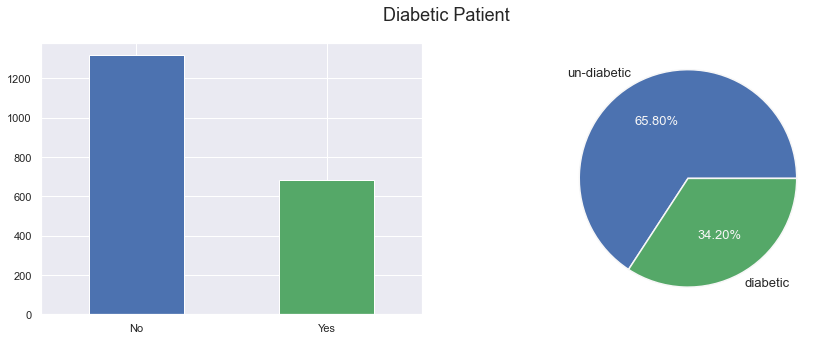

In [36]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
f.suptitle("Diabetic Patient", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("un-diabetic","diabetic"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

# Classification

In [11]:
X_Data = after_norm # independent variable

In [12]:
Y_Data = data['Outcome'] # dependent variable or class

Splitting train and test data using sklearn

In [13]:
from sklearn import model_selection
# 0.3 means 30% will be used for testing and 0.7 or 70% data will be used for training
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X_Data, Y_Data, test_size = 0.3)


In [14]:
print("Sample in training set...", X_Train.shape)
print("Sample in testing set...", X_Test.shape)
print("Sample in training set...", Y_Train.shape)
print("Sample in testing set...", Y_Test.shape)

Sample in training set... (1400, 7)
Sample in testing set... (600, 7)
Sample in training set... (1400,)
Sample in testing set... (600,)


defining models to train the data

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# K Nearest Neighbor Classifier

In [16]:
knnClassifier = KNeighborsClassifier()
knnClassifier.fit(X_Train, Y_Train)
Y_Pred = knnClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of KNN...", accuracy)

[[343  44]
 [ 90 123]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       387
           1       0.74      0.58      0.65       213

    accuracy                           0.78       600
   macro avg       0.76      0.73      0.74       600
weighted avg       0.77      0.78      0.77       600

Accuracy of KNN... 0.7766666666666666


# Decision Tree Classifier

In [17]:
dtreeClassifier = DecisionTreeClassifier()
dtreeClassifier.fit(X_Train, Y_Train)
Y_Pred = dtreeClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of Decision Tree...", accuracy)

[[382   5]
 [ 11 202]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       387
           1       0.98      0.95      0.96       213

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600

Accuracy of Decision Tree... 0.9733333333333334


# Stochastic Gradient Descent Classifier

In [18]:
sgdClassifier = SGDClassifier()
sgdClassifier.fit(X_Train, Y_Train)
Y_Pred = sgdClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of SGD...", accuracy)

[[360  27]
 [107 106]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       387
           1       0.80      0.50      0.61       213

    accuracy                           0.78       600
   macro avg       0.78      0.71      0.73       600
weighted avg       0.78      0.78      0.76       600

Accuracy of SGD... 0.7766666666666666


In [19]:
svmClassifier = SVC(kernel='linear')
svmClassifier.fit(X_Train, Y_Train)
Y_Pred = svmClassifier.predict(X_Test)
print(confusion_matrix(Y_Test, Y_Pred))
print(classification_report(Y_Test,Y_Pred))
accuracy = accuracy_score(Y_Test,Y_Pred)
print("Accuracy of SVM...", accuracy)

[[345  42]
 [ 95 118]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       387
           1       0.74      0.55      0.63       213

    accuracy                           0.77       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.77      0.77      0.76       600

Accuracy of SVM... 0.7716666666666666


# Support Vector Machine Classifier

# Comparison of Machine Learning Classifiers

The decision tree classifier well performed among other classifiers. It means that given predictor will accurately guess the
value of predicted attribute for a new data.

In [20]:
Classifier = [['KNN', 74.8],['DT', 96.0 ],['SGD', 74.5 ],['SVM', 77.8] ]
result = pd.DataFrame(Classifier, columns = ['Classifier', 'Accuracy']) 
result.head()

,Classifier,Accuracy
0,KNN,74.8
1,DT,96.0
2,SGD,74.5
3,SVM,77.8


Plotting Accuries

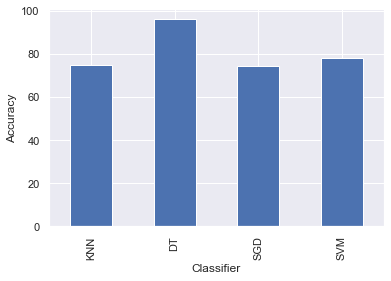

In [21]:
Accuracy = result['Accuracy'].values
Classifier = result['Classifier'].values
sns.set(style='darkgrid')
ax = result.plot(x="Classifier", y="Accuracy", kind="bar")
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
ax.get_legend().remove()
plt.show()